# <b>Kaggle Heart Disease Project Part II </b>
# December 2019

# <b>Modeling Data Analysis </b> 

Data taken from site : https://www.kaggle.com/ronitf/heart-disease-uci and additional descriptions for the features is taken from https://archive.ics.uci.edu/ml/datasets/heart+Disease  

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. 

Columns descriptions:


- A. <a href='age :'> age :</a>	 in years
- B. <a href='age :'> sex :</a>	 (1 = male; 0 = female)
- C. <a href='age :'> cp :</a>	chest pain type experienced defined as (0-4) 
        - (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- D. <a href='age :'> trestbps:</a>	resting blood pressure (in mm Hg on admission to the hospital)
- E. <a href='age :'> chol :</a>  serum cholestoral measurement in mg/dL
- F. <a href='age :'> fbs :</a>	(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
- G. <a href='age :'> restecg :</a>	resting electrocardiographic measurement defined as 
        - (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- H. <a href='age :'> thalach :</a>	 maximum heart rate achieved
- I. <a href='age :'> exang :</a>	exercise induced angina (1 = yes; 0 = no) 
- J. <a href='age :'> oldpeak :</a>	 ST depression induced by exercise relative to rest. 'ST' relates to isoelectric period when the ventricles are in between depolarization and repolarization on the ECG plot. ST depression can be associated with myocardial infarction. 
- K. <a href='age :'> slope :</a>	 the slope of the peak exercise ST segment defined as
        - (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- L. <a href='age :'> ca :</a>	number of major vessels (0-3) colored by flouroscopy
- M. <a href='age :'> tha :</a>	A blood disorder called thalassemia defined as 
        - 3 = normal; 6 = fixed defect; 7 = reversable defect
- N. <a href='age :'> target : </a>	presence of heart disease (1 = presence of heart disease or 0 = presence of heart disease)

We can divide the features above into two groups: quantitative and categorical
  - <i>Quantitative features: </i> Age, trestbps, chol, thalach, oldpeak
  - <i>Categorical features: </i> sex, cp, fbs, restecg, exang, slope, ca, thal

# Criteria I need to include

Post the link to your GitHub repo for Mini-Project part II: Modeling
Your modeling notebook should include each of the following:
(Feature engineering, if not captured in the EDA notebook. Sometimes it is easier or makes more sense to do feature engineering in the same notebook as your model.)
Splitting data into train/test sets
Build (at least one) model
Predict test set using model(s)
A quantiative metric of model(s) performance

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')




# set the graphs to show in the jupyter notebook
%matplotlib inline


# Import Machine Learning libraries for modeling in order to train and test the data.

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier






In [63]:
heart_df = pd.read_csv('heart.csv')

In [64]:
heart_df = heart_df.drop_duplicates()

In [65]:
heart_df.shape

(302, 14)

In [66]:
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [67]:
heart_df_new = heart_df[(heart_df['chol']< 500) & (heart_df['ca']< 4)]
heart_df_new.shape

(297, 14)

In [68]:
heart_df_new.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.468013,0.680135,0.956229,131.636364,245.838384,0.148148,0.525253,149.430976,0.329966,1.053535,1.397306,0.676768,2.309764,0.538721
std,9.016491,0.467211,1.033936,17.672769,48.591730,0.355846,0.526528,23.014452,0.470994,1.165696,0.618187,0.938965,0.613755,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,3.000000,1.000000


In [69]:
heart_df_new.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

# <b>Reset Index  </b> 
  - After viewing the dataset in my EDA notebook, it appears that the patients with heart disease are listed first, then patients that do not have heart disease are listed last. I need to randomize the data by resetting the index. 


In [70]:
ht_df_nw_rt_in=heart_df_new.sample(frac=1).reset_index(drop=True)
ht_df_nw_rt_in.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0
1,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
2,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
3,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
4,64,1,0,120,246,0,0,96,1,2.2,0,1,2,0
5,44,1,1,120,220,0,1,170,0,0.0,2,0,2,1
6,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
7,42,1,1,120,295,0,1,162,0,0.0,2,0,2,1
8,64,1,0,128,263,0,1,105,1,0.2,1,1,3,1
9,58,1,2,105,240,0,0,154,1,0.6,1,0,3,1


## Conclusions
- Since I am going to use this data for Machine_learning, I wanted to reset the index and randomize its order as shown above. 

# <b>Feature Engineering-Normalization </b> 

In [71]:
def normalize(dataset):
    dataNorm=((dataset-dataset.min())/(dataset.max()-dataset.min()))
    return dataNorm
heart_df_new_norm = normalize(heart_df_new)

In [72]:
heart_df_new_norm.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.367698,1.0,0.0,0.603053,0.0,0.370968,0.0,0.000000,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.426117,0.0,0.5,0.885496,0.0,0.564516,0.0,0.000000,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.268041,0.0,0.0,0.770992,0.0,0.225806,1.0,0.000000,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.378007,0.0,0.5,0.816794,0.0,0.129032,1.0,0.000000,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.783505,0.0,0.5,0.702290,1.0,0.096774,1.0,0.000000,0.666667,1.0
5,0.583333,1.0,0.000000,0.433962,0.226804,0.0,0.5,0.587786,0.0,0.064516,0.5,0.000000,0.333333,1.0
6,0.562500,0.0,0.333333,0.433962,0.577320,0.0,0.0,0.625954,0.0,0.209677,0.5,0.000000,0.666667,1.0
7,0.312500,1.0,0.333333,0.245283,0.470790,0.0,0.5,0.778626,0.0,0.000000,1.0,0.000000,1.000000,1.0
8,0.479167,1.0,0.666667,0.735849,0.250859,1.0,0.5,0.694656,0.0,0.080645,1.0,0.000000,1.000000,1.0
9,0.583333,1.0,0.666667,0.528302,0.144330,0.0,0.5,0.786260,0.0,0.258065,1.0,0.000000,0.666667,1.0


# Why I am normalizing the data 
   - There are a few reasons as to why I am normalizing this data. 
     - If I do not normalize the data then variables that are measured at different scales will not contribute equally to the analysis and might end up creating a bias. 
     - From the describe() code above, the minimum and maximum values are different, and the values are spread over a huge range.
     - Some machine learning algorithms can handle that data better when it is normalized and will help the algorithms work more efficiently. 
   - I plan to try to use the k-nearest neighbors, which the scale of a particular feature plays a role of a weight. The bigger are the values the more important is the feature. I may also try neural networks, in which normalization may speeds up the training. Another one I may try is decision tree based algorithms, which are not effected by normalization of the data.

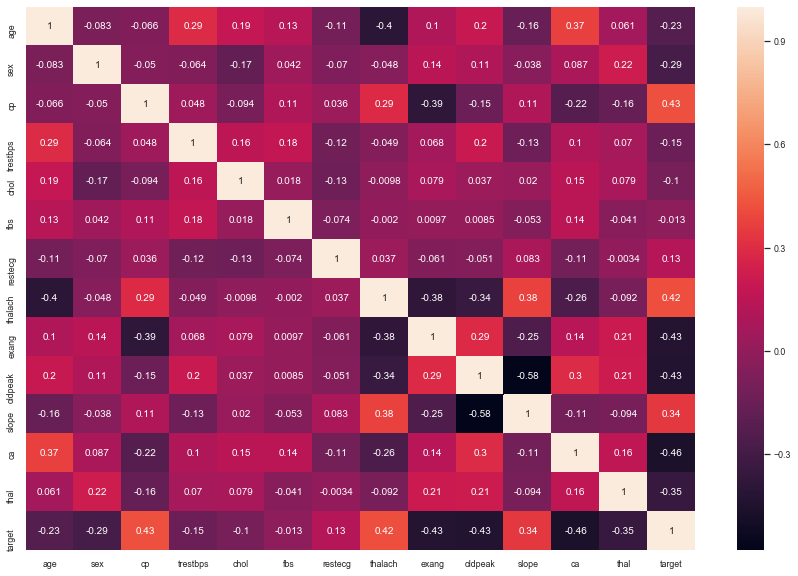

In [73]:
plt.figure(figsize=(15,10))
sns.heatmap(heart_df_new_norm.corr(), annot=True)

- Conclusions:
  - The values show the correlation score between the row and column at each point. Values will range up to from 1 (very strong positve correlation) to -1 (very strong negative correlation, or 0 (no relationship). 
  - This heatmap confirms the conclusions I made for the heatmap in my EDA notebook. 
      - I find no feature that has a significant correlation with the target value. 
      - Some features have a lower positive correlation with the target value, which includes the features cp, thalach, and slope. 
      - Some features have a negative correlation with the target value, which includes the features exang, oldpeak, ca, and thal. 

# Categorical Feature Conversion
  - After exploring the dataset, I observed that there are some categorical features: sex, cp, fbs, restecg, exang, slope, ca, and thal. These features will need to be converted into dummy variables and scale all the values before training the Machine Learning models. First, I'll use the 'get_dummies method' to create dummy columns for categorical variables.

In [74]:
heart_df_new_norm_fc = pd.get_dummies(heart_df_new_norm, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [75]:
heart_df_new_norm_fc.head(20)

,age,trestbps,chol,thalach,oldpeak,target,sex_0.0,sex_1.0,cp_0.0,cp_0.3333333333333333,...,slope_0.5,slope_1.0,ca_0.0,ca_0.3333333333333333,ca_0.6666666666666666,ca_1.0,thal_0.0,thal_0.3333333333333333,thal_0.6666666666666666,thal_1.0
0,0.708333,0.481132,0.367698,0.603053,0.370968,1.0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0.166667,0.339623,0.426117,0.885496,0.564516,1.0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0.250000,0.339623,0.268041,0.770992,0.225806,1.0,1,0,0,1,...,0,1,1,0,0,0,0,0,1,0
3,0.562500,0.245283,0.378007,0.816794,0.129032,1.0,0,1,0,1,...,0,1,1,0,0,0,0,0,1,0
4,0.583333,0.245283,0.783505,0.702290,0.096774,1.0,1,0,1,0,...,0,1,1,0,0,0,0,0,1,0
5,0.583333,0.433962,0.226804,0.587786,0.064516,1.0,0,1,1,0,...,1,0,1,0,0,0,0,1,0,0
6,0.562500,0.433962,0.577320,0.625954,0.209677,1.0,1,0,0,1,...,1,0,1,0,0,0,0,0,1,0
7,0.312500,0.245283,0.470790,0.778626,0.000000,1.0,0,1,0,1,...,0,1,1,0,0,0,0,0,0,1
8,0.479167,0.735849,0.250859,0.694656,0.080645,1.0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,1
9,0.583333,0.528302,0.144330,0.786260,0.258065,1.0,0,1,0,0,...,0,1,1,0,0,0,0,0,1,0


# Data Scaling
- I used data scaling to equalize the variation in value for each feature so that it would not affect the process of good machine learning.


In [76]:
# split dataset into data and labels
heart_data = heart_df_new_norm_fc.drop(columns="target")
heart_labels = heart_df_new_norm_fc.iloc[:,-1]

scaler = StandardScaler()
data_col_scaled = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
heart_df_new_norm_fc [data_col_scaled] = scaler.fit_transform(heart_df_new_norm_fc [data_col_scaled])



In [77]:
heart_df_new_norm_fc [data_col_scaled].head(20)

,age,trestbps,chol,thalach,oldpeak
0,0.947862,0.757447,-0.264655,0.024766,1.071093
1,-1.940610,-0.092749,0.085789,1.635165,2.102258
2,-1.496230,-0.092749,-0.862472,0.982301,0.297719
3,0.170196,-0.659546,-0.202812,1.243447,-0.217864
4,0.281291,-0.659546,2.229683,0.590582,-0.389725
5,0.281291,0.474049,-1.109844,-0.062282,-0.561586
6,0.170196,0.474049,0.992821,0.155339,0.211788
7,-1.162945,-0.659546,0.353776,1.025825,-0.905308
8,-0.274184,2.287800,-0.965544,0.547058,-0.475655
9,0.281291,1.040846,-1.604589,1.069349,0.469579


In [78]:
heart_df_new_norm_fc [data_col_scaled].mean()

age         2.654069e-16
trestbps    6.644517e-17
chol       -3.878304e-17
thalach    -3.371788e-16
oldpeak    -6.242668e-17
dtype: float64

In [79]:
heart_df_new_norm_fc [data_col_scaled].std()

age         1.001688
trestbps    1.001688
chol        1.001688
thalach     1.001688
oldpeak     1.001688
dtype: float64

In [80]:
print('Min values (age, trestbps, chol, thalach, oldpeak): ', heart_df_new_norm_fc [data_col_scaled].min(axis=0))
print('Max values (age, trestbps, chol, thalach, oldpeak): ', heart_df_new_norm_fc [data_col_scaled].max(axis=0))

Min values (age, trestbps, chol, thalach, oldpeak):  age        -2.829371
trestbps   -2.133219
chol       -2.470392
thalach    -3.413653
oldpeak    -0.905308
dtype: float64
Max values (age, trestbps, chol, thalach, oldpeak):  age         2.503193
trestbps    3.874832
chol        3.528388
thalach     2.288030
oldpeak     4.422380
dtype: float64


# Conclusion
 - As expected, the mean of each data column scaled variable is now around zero and the standard deviation is set to 1. Thus, all the variable values lie within the same range. Interestingly, when I look at the the minimum and maximum values, they vary according to how spread out the variable was before I normalized the data so it appears that the scaling does not affect these values. 

# Using Machine Learning Algorithms to train and test dataset

  - After applying data scaling to dataset, I can import the data so I can split the dataset into training and testing datasets. 

In [81]:
# Split into training and test set
y = heart_df_new_norm_fc ['target']
X = heart_df_new_norm_fc.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [82]:
X_train.shape

(237, 29)

In [83]:
X_test.shape

(60, 29)

In [84]:
y_train.shape

(237,)

In [85]:
y_test.shape

(60,)

Training Accuracy  88.60759493670885
Testing Accuracy  78.33333333333333


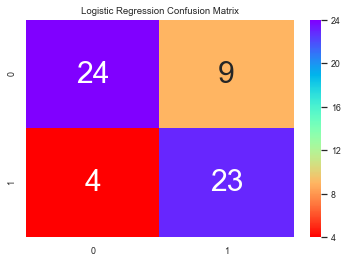

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
lr = LogisticRegression()

lr.fit(X_train,y_train)
lr_acc=lr.score(X_test, y_test)*100

print("Training Accuracy ", lr.score(X_train, y_train)*100)
print("Testing Accuracy ",lr_acc )

y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test,y_pred_lr)

sns.set(font_scale=0.8)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="rainbow_r",fmt="g",cbar=True, annot_kws={"size": 30})

#### K Neighbors Classifier

The classification score varies based on different values of neighbors that we choose. Thus, I'll plot a score graph for different values of K (neighbors) and check when do I achieve the best score.

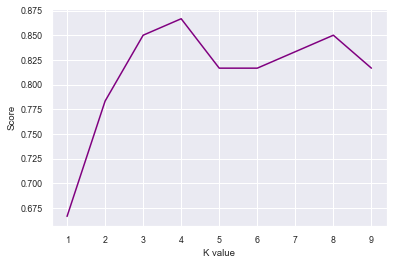

Training Accuracy is  86.49789029535864
Testing Accuracy is 86.67%


In [118]:
# Build knn classifier and create empty arrays to catch results from a variety of the n_neighbors parameter for KNeighborsClassifier(), ranging from 1-20.
knn_scores = []
for k in range(1,10):
    knn = KNeighborsClassifier(n_neighbors = k)
    # Fit training data
    knn.fit(X_train, y_train)
    knn_scores.append(knn.score(X_test, y_test))
    y_pred_knn = knn.predict(X_test)
    cm_knn = confusion_matrix(y_test,y_pred_knn)
    
plt.plot(range(1,10), knn_scores, color= "Purple")
plt.xticks(np.arange(1,10,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

knn_acc = max(knn_scores)*100
print("Training Accuracy is ", knn.score(X_train, y_train)*100)
print("Testing Accuracy is {:.2f}%".format(knn_acc))

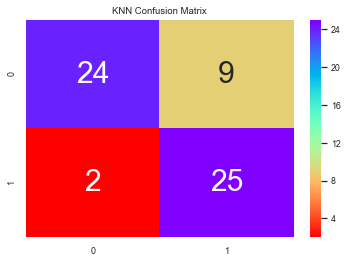

In [119]:
# view the confusion matrix
sns.set(font_scale=0.8)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="rainbow_r",fmt="g",cbar=True, annot_kws={"size": 30})

In [121]:
precision = (round(24/25, 2))           
print(f"The precision score for a healthy diagnosis is {precision}")

The precision score for a healthy diagnosis is 0.96


# Conclusion 
 - In this project, I used Machine Learning to predict whether a person is suffering from a heart disease. After importing the data, I analysed it using plots. Then, I did generated dummy variables for categorical features and scaled other features. After experimenting with two binary classification machine learning algorithms (logistic regression and k-nearest neighbors), the algorithms produced accurate heart disease predictions. Both algorithms returned an accuracy score of ~88% and ~86%, respectively. I looked at the confusion matrices of both algorithms. 
 - As demonstrated in the logistic regression confusion matrix above, the model accurately predicted 23 patients who exhibited heart disease and 26 patients who did not exhibit heart disease (out of 60 total test patients). However, the model incorrectly predicted that 9 patients exhibited heart disease when in actuality they did not and 4 patients that did not exhibit heart disease when in actuality they did.
- As demonstrated in the KNN confusion matrix above, the model accurately predicted 25 patients who exhibited heart disease and 24 patients who did not exhibit heart disease (out of 60 total test patients). However, the model incorrectly predicted that 9 patients exhibited heart disease when in actuality they did not and 2 patients that did not exhibit heart disease when in actuality they did.
 - The k-nearest neighbors had returned fewer false negatives, in other words: fewer false healthy diagnoses when the patients were actually sick. For this case study, I felt that it was more dangerous for the patient if they were misdiagnosed with a false negative, because the consequence could be that a sick patient would not receive the medical treatment. It would be interesting to see if the other binary classification machine learning algorithms would fare better in its predictive nature.

## Overall Conclusions
 - To produce a more accurate heart disease prediction model, it would be helpful to obtain a larger dataset including more current data. It would be interesting to see if the predictions I made in this report would hold up. According to the American Heart Association, there are now available many medical tests and new measurements that help identify of heart disease. These new metrics would be of interest to evaluate using these binary classification machine learning algorithms. 

- Note This was just for fun and I don't want to be graded. I wanted to see if I could write this code. I would appreciate any feedback on this code below. 

In [89]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [90]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=29))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [91]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
237/237 [==============================] - 2s 8ms/step - loss: 0.6676 - accuracy: 0.5949
Epoch 2/100
237/237 [==============================] - 0s 1ms/step - loss: 0.6383 - accuracy: 0.6498
Epoch 3/100
237/237 [==============================] - 0s 844us/step - loss: 0.6122 - accuracy: 0.6709
Epoch 4/100
237/237 [==============================] - 0s 1ms/step - loss: 0.5879 - accuracy: 0.7300
Epoch 5/100
237/237 [==============================] - 0s 2ms/step - loss: 0.5645 - accuracy: 0.7553
Epoch 6/100
237/237 [==============================] - 0s 1ms/step - loss: 0.5425 - accuracy: 0.7511
Epoch 7/100
237/237 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.7848
Epoch 8/100
237/237 [==============================] - 0s 1ms/step - loss: 0.5032 - accuracy: 0.7890
Epoch 9/100
237/237 [==============================] - 0s 599us/step - loss: 0.4848 - accuracy: 0.8101
Epoch 10/100
237/237 [==============================] - 0s 1ms/step - loss: 0.4680 - ac

In [92]:
y_pred_nn = model.predict(X_test)

In [93]:
y_pred_nn.shape

(60, 1)

In [94]:
rounded = [round(x[0]) for x in y_pred_nn]
y_pred_nn = rounded

score_nn = round(accuracy_score(y_pred_nn,y_test)*100,2)
print("The accuracy for Neural Network is: "+str(score_nn)+" %")

The accuracy for Neural Network is: 76.67 %
